In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import pyplot as plt
import imblearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os 

In [17]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/diabetic_data.csv', index_col=0, parse_dates=True)
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
missing_values = ["n/a", "na", "--","?"]
df= pd.read_csv("data/diabetic_data.csv",index_col=0, parse_dates=True,na_values = missing_values)
df["readmitted"].replace({">30": "NO"}, inplace=True)
df["readmitted"].replace({"<30": "Yes"}, inplace=True)
df.head()


/home/nick/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [30]:
df = df[((df.discharge_disposition_id != 11) & 
         (df.discharge_disposition_id != 13) &
         (df.discharge_disposition_id != 14) & 
         (df.discharge_disposition_id != 19) & 
         (df.discharge_disposition_id != 20) & 
         (df.discharge_disposition_id != 21))] 

In [31]:
icd9code = [(1, 139),
            (140, 239),
            (240, 279),
            (280, 289),
            (290, 319),
            (320, 389),
            (390, 459),
            (460, 519),
            (520, 579),
            (580, 629),
            (630, 679),
            (680, 709),
            (710, 739),
            (740, 759),
            (760, 779),
            (780, 799),
            (800, 999)]
icd9codelist = ['Infectious And Parasitic Diseases',
                'Neoplasms',
                'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
                'Diseases Of The Blood And Blood-Forming Organs',
                'Mental Disorders',
                'Diseases Of The Nervous System And Sense Organs',
                'Diseases Of The Circulatory System',
                'Diseases Of The Respiratory System',
                'Diseases Of The Digestive System',
                'Diseases Of The Genitourinary System',
                'Complications Of Pregnancy, Childbirth, And The Puerperium',
                'Diseases Of The Skin And Subcutaneous Tissue',
                'Diseases Of The Musculoskeletal System And Connective Tissue',
                'Congential Anomalies',
                'Certain Conditions Originating In The Perinatal Period',
                'Symptoms, Signs, And Ill-Defined Conditions',
                'Injury And Poisoning']
codes = zip(icd9code, icd9codelist)
codelist = set(codes)
codelist

{((1, 139), 'Infectious And Parasitic Diseases'),
 ((140, 239), 'Neoplasms'),
 ((240, 279),
  'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
 ((280, 289), 'Diseases Of The Blood And Blood-Forming Organs'),
 ((290, 319), 'Mental Disorders'),
 ((320, 389), 'Diseases Of The Nervous System And Sense Organs'),
 ((390, 459), 'Diseases Of The Circulatory System'),
 ((460, 519), 'Diseases Of The Respiratory System'),
 ((520, 579), 'Diseases Of The Digestive System'),
 ((580, 629), 'Diseases Of The Genitourinary System'),
 ((630, 679), 'Complications Of Pregnancy, Childbirth, And The Puerperium'),
 ((680, 709), 'Diseases Of The Skin And Subcutaneous Tissue'),
 ((710, 739), 'Diseases Of The Musculoskeletal System And Connective Tissue'),
 ((740, 759), 'Congential Anomalies'),
 ((760, 779), 'Certain Conditions Originating In The Perinatal Period'),
 ((780, 799), 'Symptoms, Signs, And Ill-Defined Conditions'),
 ((800, 999), 'Injury And Poisoning')}

In [32]:
for num_range, diagnosis in codelist:
    oldlist = range(num_range[0], num_range[1]+1)
    oldlist = [str(x) for x in oldlist]
    newlist = [diagnosis] * len(oldlist)
    for col in ['diag_1', 'diag_2', 'diag_3']:
        df[col].replace(oldlist, newlist, inplace=True)
        
for col in ['diag_1', 'diag_2', 'diag_3']:
    df.loc[df[col].str.contains('V', na=False), col] = 'Supplementary Classification of Factors Influencing Health Status and Contact with Health Services'
    df.loc[df[col].str.contains('250', na=False), col] = 'Diabetes'
    df.loc[df[col].str.contains('E', na=False), col] = 'External Causes of Injuries and Poisonings'

In [33]:
df[['diag_1', 'diag_2', 'diag_3']]

,diag_1,diag_2,diag_3
encounter_id,,,
2278392,Diabetes,NaN,NaN
149190,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings
64410,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...
500364,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System
16680,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings
...,...,...,...
443847548,Diabetes,Mental Disorders,Diseases Of The Circulatory System
443847782,Diseases Of The Digestive System,External Causes of Injuries and Poisonings,"Symptoms, Signs, And Ill-Defined Conditions"
443854148,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders


In [34]:
df = df.drop(columns=['patient_nbr','weight', 'payer_code',"medical_specialty"])

In [35]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,Diabetes,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
df = df.dropna()
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
149190,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,External Causes of Injuries and Poisonings,Diabetes,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,"Complications Of Pregnancy, Childbirth, And Th...",External Causes of Injuries and Poisonings,Supplementary Classification of Factors Influe...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious And Parasitic Diseases,Diabetes,Diseases Of The Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,External Causes of Injuries and Poisonings,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,Diseases Of The Circulatory System,Diseases Of The Circulatory System,External Causes of Injuries and Poisonings,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,Diabetes,Mental Disorders,Diseases Of The Circulatory System,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443847782,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,Diseases Of The Digestive System,External Causes of Injuries and Poisonings,"Symptoms, Signs, And Ill-Defined Conditions",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,Infectious And Parasitic Diseases,Diseases Of The Genitourinary System,Mental Disorders,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


                          admission_type_id  discharge_disposition_id  \
admission_type_id                  1.000000                  0.089929   
discharge_disposition_id           0.089929                  1.000000   
admission_source_id                0.106133                  0.007893   
time_in_hospital                  -0.012613                  0.161386   
num_lab_procedures                -0.139159                  0.008855   
num_procedures                     0.132903                  0.011142   
num_medications                    0.082299                  0.104468   
number_outpatient                  0.025685                 -0.010879   
number_emergency                  -0.020117                 -0.025843   
number_inpatient                  -0.036797                  0.014057   
number_diagnoses                  -0.120784                  0.023194   

                          admission_source_id  time_in_hospital  \
admission_type_id                    0.106133         -0

<AxesSubplot:>

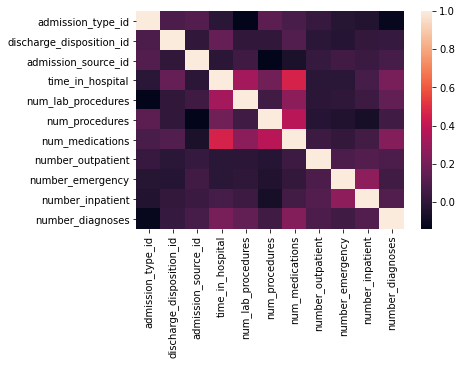

In [37]:
corr = df.corr(method="pearson")
print(corr)
sns.heatmap(corr)

In [38]:
df["readmitted"].describe()

count     95673
unique        2
top          NO
freq      84650
Name: readmitted, dtype: object

/home/nick/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


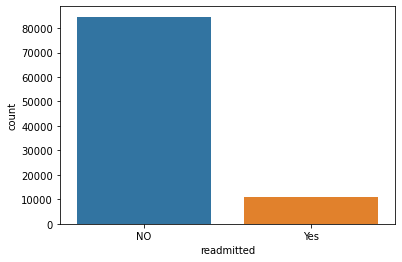

In [39]:
sns.countplot(df['readmitted'])
plt.show()

In [46]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns_id = df.columns.get_indexer(cat_columns)
df[cat_columns] = df[cat_columns].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x : x.cat.codes)

In [48]:
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1:]


In [53]:
smotenc = imblearn.over_sampling.SMOTENC(categorical_features=cat_columns_id[:-1], random_state=0, n_jobs=-1)
x_resampled, y_resampled = smotenc.fit_resample(x, y)

/home/nick/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


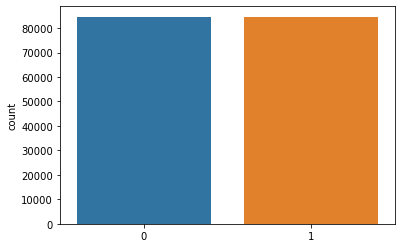

In [55]:
sns.countplot(y_resampled)
plt.show()

In [57]:
scaler = preprocessing.StandardScaler()
x_scaled = x_resampled.copy()
x_scaled = scaler.fit_transform(x_scaled)
print(x_scaled)


[[ 3.42382000e-01 -8.91889747e-01 -3.60941006e+00 ... -2.43037228e-03
  -1.09044199e+00  4.71116076e-01]
 [-2.37319143e+00 -8.91889747e-01 -2.92387631e+00 ... -2.43037228e-03
   9.17059330e-01  4.71116076e-01]
 [ 3.42382000e-01  1.12116114e+00 -2.23834257e+00 ... -2.43037228e-03
  -1.09044199e+00  4.71116076e-01]
 ...
 [-2.37319143e+00  1.12116114e+00 -8.67275093e-01 ... -2.43037228e-03
  -1.09044199e+00  4.71116076e-01]
 [ 3.42382000e-01 -8.91889747e-01 -1.81741352e-01 ... -2.43037228e-03
  -1.09044199e+00  4.71116076e-01]
 [ 3.42382000e-01 -8.91889747e-01 -1.55280883e+00 ... -2.43037228e-03
  -1.09044199e+00  4.71116076e-01]]


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=0)

In [63]:
os.makedirs('preprocessed', exist_ok=True)
np.savetxt("preprocessed/x_train.csv", x_train, delimiter=",")
np.savetxt("preprocessed/y_train.csv", y_train, delimiter=",")
np.savetxt("preprocessed/x_test.csv", x_test, delimiter=",")
np.savetxt("preprocessed/y_test.csv", y_test, delimiter=",")